# Восстановление золота из руды

Необходимо подготовить модель машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Нужно использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Краткое описание технологческого процесса**: когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.  
  
В файле **наименования признаков построены** следующим образом: `[этап].[тип_параметра].[название_параметра]`  
  
Возможные значения для блока `[этап]`:  
`rougher` — флотация  
`primary_cleaner` — первичная очистка  
`secondary_cleaner` — вторичная очистка  
`final` — финальные характеристики  
  
Возможные значения для блока `[тип_параметра]`:  
`input` — параметры сырья  
`output` — параметры продукта  
`state` — параметры, характеризующие текущее состояние этапа  
`calculation` — расчётные характеристики

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-файлов-и-их-изучение" data-toc-modified-id="Открытие-файлов-и-их-изучение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файлов и их изучение</a></span></li><li><span><a href="#Проверка-расчетов-эффективности" data-toc-modified-id="Проверка-расчетов-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчетов эффективности</a></span></li><li><span><a href="#Выявление-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Выявление-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выявление признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Изучение-выборки" data-toc-modified-id="Изучение-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение выборки</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрации-металлов-на-различных-этапах-очистки" data-toc-modified-id="Анализ-изменения-концентрации-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрации металлов на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределений-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределений-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределений гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ на разных стадиях</a></span></li><li><span><a href="#Удаление-выбросов" data-toc-modified-id="Удаление-выбросов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление выбросов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функции-для-проверки-и-построения-моделей" data-toc-modified-id="Напишем-функции-для-проверки-и-построения-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функции для проверки и построения моделей</a></span></li><li><span><a href="#Прогнозирование-эффективности-обогащения-чернового-концентрата" data-toc-modified-id="Прогнозирование-эффективности-обогащения-чернового-концентрата-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Прогнозирование эффективности обогащения чернового концентрата</a></span><ul class="toc-item"><li><span><a href="#Исследование-признаков-на-наличие-корреляции" data-toc-modified-id="Исследование-признаков-на-наличие-корреляции-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Исследование признаков на наличие корреляции</a></span></li><li><span><a href="#Модель-линейной-регрессии-OLS" data-toc-modified-id="Модель-линейной-регрессии-OLS-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель линейной регрессии OLS</a></span></li><li><span><a href="#Модель-регрессии-Ridge" data-toc-modified-id="Модель-регрессии-Ridge-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель регрессии Ridge</a></span></li><li><span><a href="#Модель-регрессии-Lasso" data-toc-modified-id="Модель-регрессии-Lasso-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Модель регрессии Lasso</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Модель дерева решений</a></span></li></ul></li><li><span><a href="#Прогнозирование-эффективности-обогащения-финального-концентрата" data-toc-modified-id="Прогнозирование-эффективности-обогащения-финального-концентрата-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Прогнозирование эффективности обогащения финального концентрата</a></span><ul class="toc-item"><li><span><a href="#Исследование-признаков-на-наличие-корреляции" data-toc-modified-id="Исследование-признаков-на-наличие-корреляции-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Исследование признаков на наличие корреляции</a></span></li><li><span><a href="#Модель-линейной-регрессии-OLS" data-toc-modified-id="Модель-линейной-регрессии-OLS-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Модель линейной регрессии OLS</a></span></li><li><span><a href="#Модель-регрессии-Ridge" data-toc-modified-id="Модель-регрессии-Ridge-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Модель регрессии Ridge</a></span></li><li><span><a href="#Модель-регрессии-Lasso" data-toc-modified-id="Модель-регрессии-Lasso-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Модель регрессии Lasso</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Модель дерева решений</a></span></li></ul></li><li><span><a href="#Вывод-результатов-и-проверка-модели" data-toc-modified-id="Вывод-результатов-и-проверка-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод результатов и проверка модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
# Импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
# Избавимся от предупреждений

import warnings
warnings.filterwarnings('ignore')

### Открытие файлов и их изучение

In [3]:
try:
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    initial_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    train_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    test_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    initial_data = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

Познакомимся с данными. Для этого выведем информацию о каждом датасете и первые строчки для лучшего понимания его структуры

In [4]:
# Тренировочная выборка
display(train_data.head(), train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


None

In [5]:
# Тестовая выборка
display(test_data.head(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


None

In [6]:
# Изначальная выборка
display(initial_data.head(), initial_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


None

Во всех датасетах есть пропуски, которые необходимо устранить. Также, необходимо изменить тип данных в столбце с датой с вещественного на временной

### Проверка расчетов эффективности 

Напишем функцию для расчета эффективности и проверим вычисления в датасете

In [7]:
def effectivity_calculator(concentrate, feed, tail):
    return (concentrate * (feed - tail)) * 100 / (feed * (concentrate - tail))

In [8]:
# Вычислим эффективность
rougher_output_calculated = (
    effectivity_calculator(train_data['rougher.output.concentrate_au'], 
                           train_data['rougher.input.feed_au'], 
                           train_data['rougher.output.tail_au'])
)

In [9]:
# Посчитаем среднюю абсолютную ошибку между нашими расчетами и значениями в таблице
# При небольшой стандартной ошибке можно сделать вывод, что расчеты в датасете верны

mean_absolute_error(train_data['rougher.output.recovery'], rougher_output_calculated)

1.1131451184435918e-14

Так как значение средней абсолютной ошибки очень низкое, можно сделать вывод, что эффективность обогащения рассчитана верно

### Выявление признаков, недоступных в тестовой выборке

In [10]:
absent_columns = []

print('Признаки, не вошедшие в тестовую выборку:\n')
for col in initial_data.columns:
    if col not in test_data.columns:
        absent_columns.append(col)
        print(col)

Признаки, не вошедшие в тестовую выборку:

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondar

В тестовую выборку не входят признаки, которые недоступны из-за того, что измеряются позже. Например, `final` и `calculation` включает в себя финальные характеристики этапа, которые замеряются после проведения этапа, то есть после получения остальных характеристик. Также, `tail` отражает отвальные хвосты, которые также замеряются посде проведения этапа.  
  
Так как все признаки в таблицах, кроме времени, типа float, то и все невошедшие в тестовую выборку столбцы относятся к типу данных с нецелыми числами

Так как в обучении модели не могут использоваться признаки, измеряемые после проведения этапа, необходимо удалить данные признаки из обучающей выборки

In [11]:
# Сохраним столбцы с целевыми переменными
rougher_recovery_column = train_data['rougher.output.recovery']
final_recovery_column = train_data['final.output.recovery']

# Удалим ранее обозначенные столбцы

train_data = train_data[test_data.columns]

# Так как из датасета также были удалены целевые переменные, вернем их обратно
train_data['rougher.output.recovery'] = rougher_recovery_column
train_data['final.output.recovery'] = final_recovery_column

# set(train_data.columns) - set(test_data.columns)

Так как в тестовой выборке нет целевых признаков, добавим их из изначального датасета, ориентируясь по столбцу с датой

In [12]:
test_data = test_data.merge(initial_data[
    ['date', 'rougher.output.recovery', 'final.output.recovery']
], on=['date'], how='left').dropna(subset=['rougher.output.recovery', 'final.output.recovery'], axis=0)
# test_data.head()

### Предобработка данных

Изменим тип данных в столбце с датой

In [13]:
initial_data['date'] = pd.to_datetime(initial_data['date'], format='%Y-%m-%d %H:%M:%S')
#initial_data.info()

train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
#train_data.info()

test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
#test_data.info()

Проверим данные на наличие дубликатов

In [14]:
print(f'Количество дубликатов в обучающей выборке: {train_data.duplicated().sum()}')
print(f'Количество дубликатов в тестовой выборке: {test_data.duplicated().sum()}')

Количество дубликатов в обучающей выборке: 0
Количество дубликатов в тестовой выборке: 0


Заполним пропуски в данных. Так как в условии сказано, что соседние по времени параметры похожи, можно применить технику LOCF (Last observation carried forward) - заполнение пропусков последним наблюдением

In [15]:
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')
initial_data = initial_data.fillna(method='ffill')

Предобработка данных закончена:
- Был изменен тип данных в столбце `data`
- Данные были проверены на наличие дубликатов
- Были обработаны пропуски с помощью метода LOCF  
  
Данные готовы к анализу

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Спасибо за рекомендацию)
</div> 

## Изучение выборки

### Анализ изменения концентрации металлов на различных этапах очистки

Для начала сохраним необходимые данные в отдельные датасеты

In [16]:
labels = ['до флотации', 'после флотации', 'после первичной очистки', 'после второй очистки']
stages = ['before_flotation', 'after_flotation', 'after_primary_cleaner', 'after_secondary_cleaner']

au_initial_data = initial_data[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                                'primary_cleaner.output.concentrate_au', 
                                'final.output.concentrate_au']]
au_initial_data.columns = stages
ag_initial_data = initial_data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                                'primary_cleaner.output.concentrate_ag', 
                                'final.output.concentrate_ag']]
ag_initial_data.columns = stages
pb_initial_data = initial_data[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                                'primary_cleaner.output.concentrate_pb', 
                                'final.output.concentrate_pb']]
pb_initial_data.columns = stages

Построим график динамики средней концентрации для металлов и выведем информацию о числовых значениях в таблице

,Золото,Серебро,Свинец
до флотации,8.266097,8.794927,3.585096
после флотации,19.772000,11.994759,7.606272
после первичной очистки,32.119400,8.442408,9.810317
после второй очистки,44.076513,5.168387,9.978821


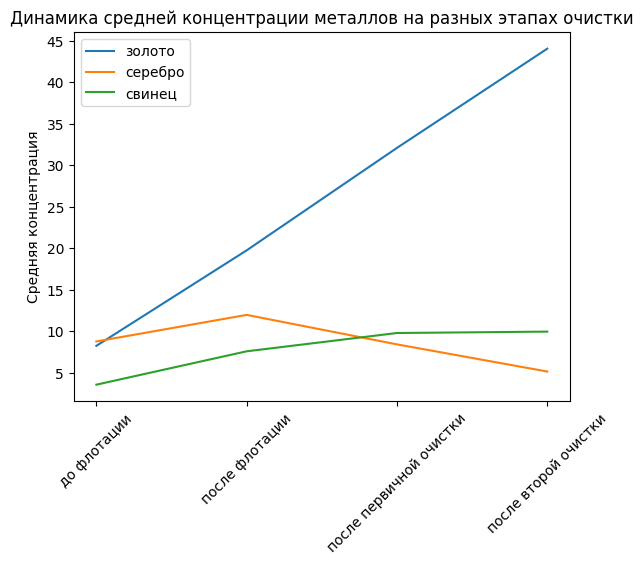

In [17]:
mean_changes = pd.DataFrame(zip(au_initial_data.mean(), ag_initial_data.mean(), pb_initial_data.mean()))
mean_changes.columns = ['Золото', 'Серебро', 'Свинец']
mean_changes = mean_changes.set_index([labels])
display(mean_changes)

plt.plot(labels, au_initial_data.mean(), label='золото')
plt.plot(labels, ag_initial_data.mean(), label='серебро')
plt.plot(labels, pb_initial_data.mean(), label='свинец')
plt.legend()
plt.xticks(rotation=45)
plt.title('Динамика средней концентрации металлов на разных этапах очистки')
plt.ylabel('Средняя концентрация')
plt.show()

Из графика можно заметить линейный рост средней концентрации золота. Средняя концентрация свинца растет на каждом этапе. Рост замедляется по мере приближения к последнему этапу, что видно по графику (линия становится более пологой). Средняя концентрация серебра растет после флотации, а на последующих этапах убывает

### Сравнение распределений гранул сырья на обучающей и тестовой выборках

Для того, чтобы убедиться в правильности оценок будущих прогнозов, необходимо проверить, насколько разные распределения гранул сырья на тренировочной и тестовой выборках.  
  
Если распределения сильно различаются, это может привести к неправильным прогнозам, так как модель будет переобучена. В частности, модель будет хорошо предсказывать значения целевых показателей на обучающей выборке. Однако, если показать ей совсем другие значения сырья, то это приведет к неправильным прогнозам, так как модель научилась хорошо предсказывать целевые показатели только для определенного уровня сырья.  
  
Следовательно, распределения должны быть примерно одинаковыми для качественной проверки модели и наиболее точных предсказаний

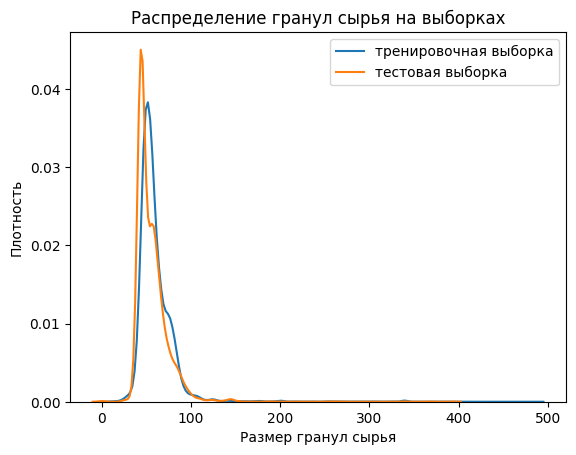

In [18]:
sns.kdeplot(train_data['rougher.input.feed_size'], label='тренировочная выборка')
sns.kdeplot(test_data['rougher.input.feed_size'], label='тестовая выборка')
plt.legend()
plt.title('Распределение гранул сырья на выборках')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность')
plt.show()

Распределения не сильно отличаются друг от друга, что позволяет сделать вывод о правильности дальнейшей оценки целевых показателей

### Исследование суммарной концентрации веществ на разных стадиях

In [19]:
def total_metal(i):
    pd.DataFrame(
        zip(au_initial_data[stages[i]], 
            ag_initial_data[stages[i]], 
            pb_initial_data[stages[i]]
           )
    ).sum(axis=1).plot(kind='hist', bins=50, figsize=(17, 7))
    plt.title(f'Суммарная концентрация металлов {labels[i]}')
    plt.xlabel('Общая концентрация')
    plt.ylabel('Частота')
    plt.show()

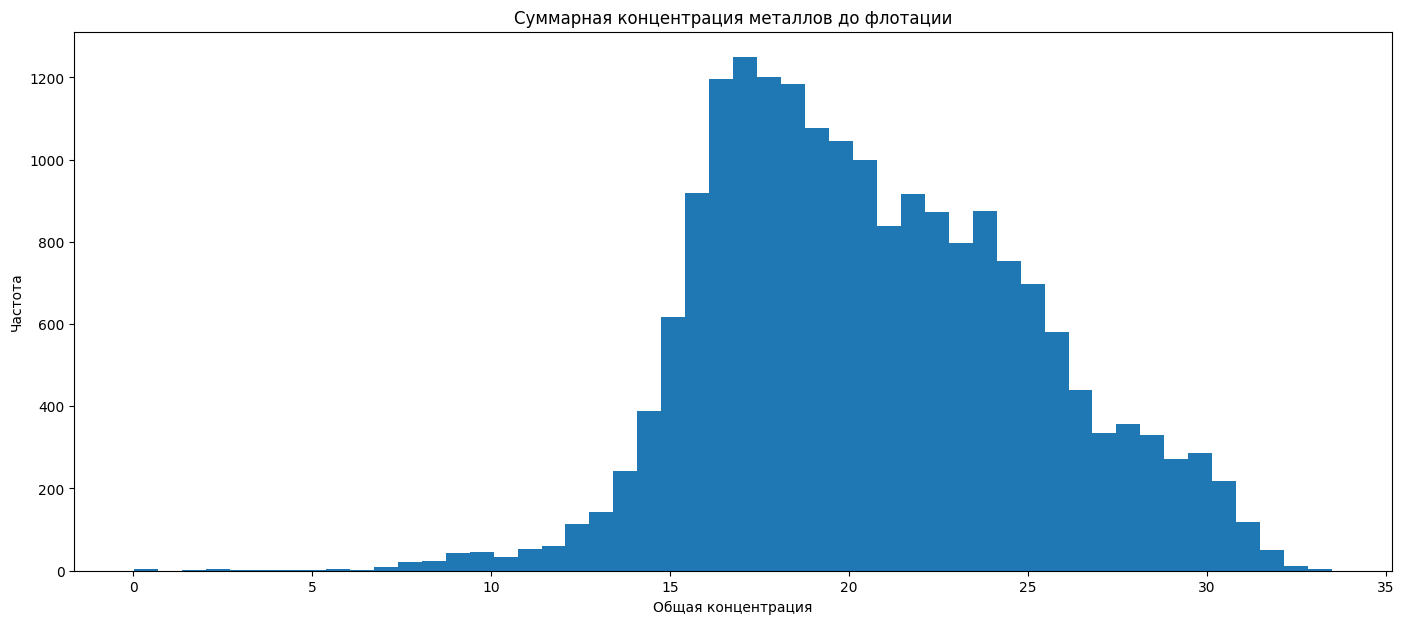

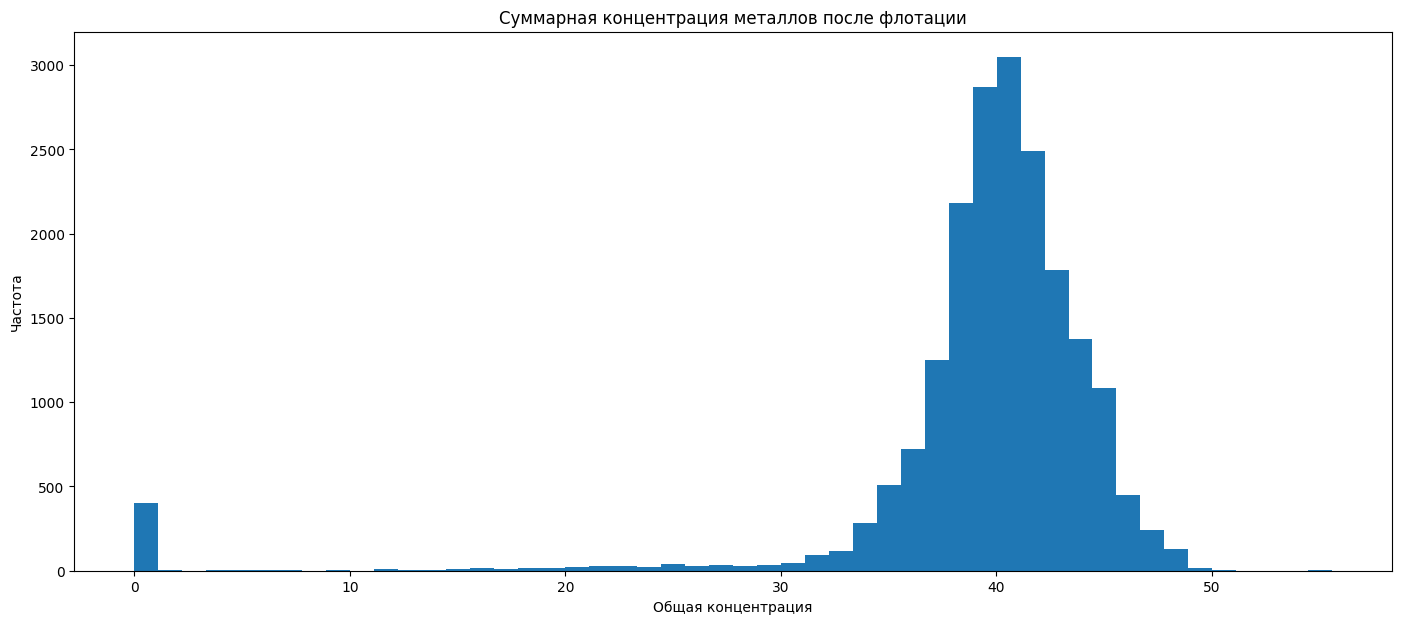

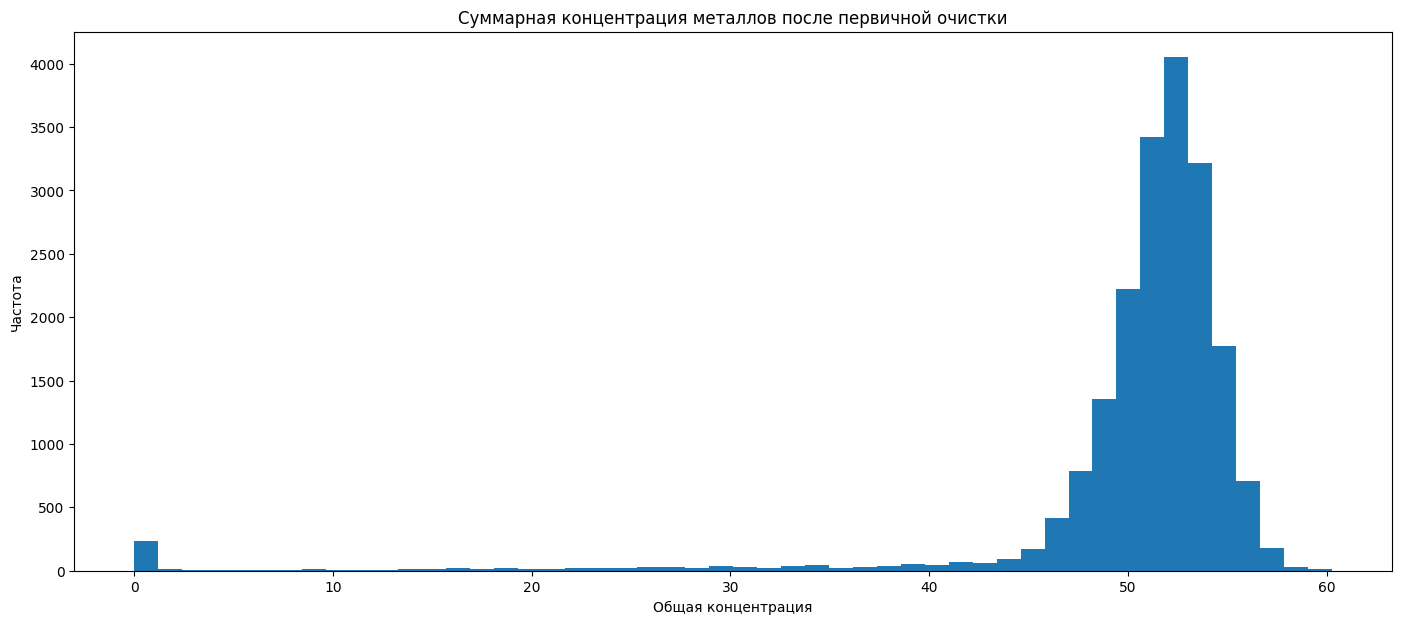

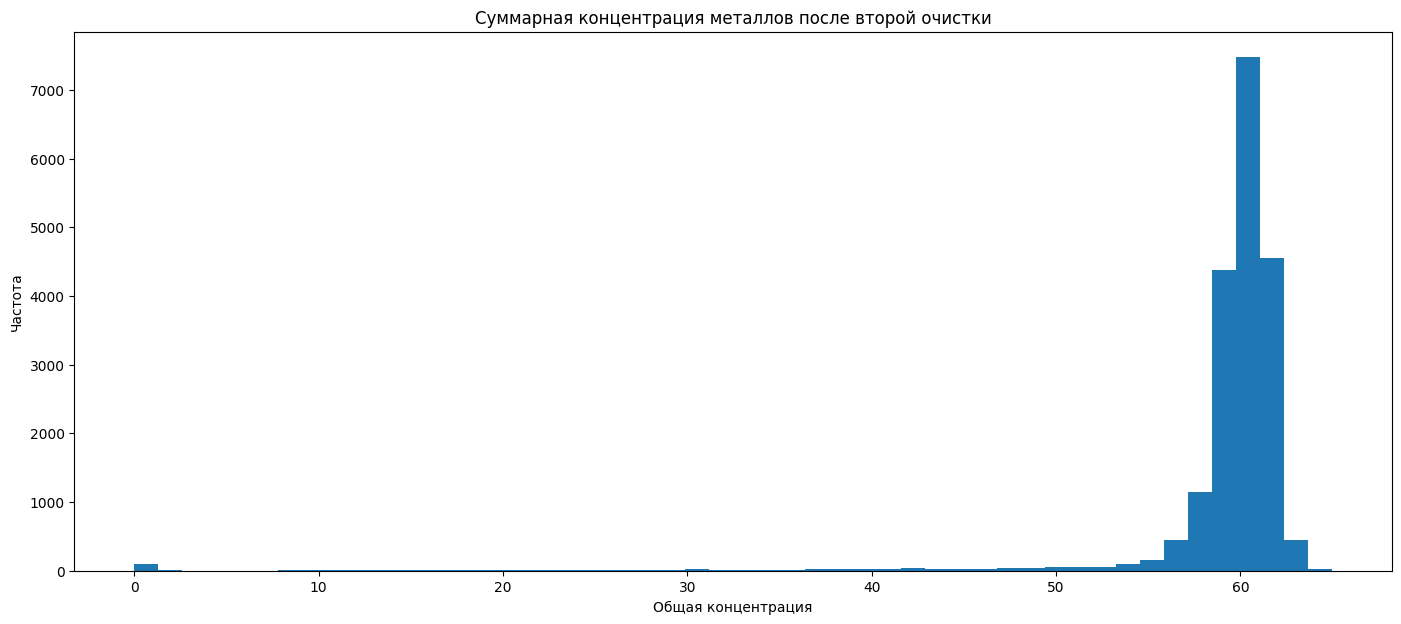

In [20]:
for i in range(4):
    total_metal(i)

Распределение суммарной концентрациии металлов до флотации напоминает Пуассоновское с наиболее частым  значением около 17. После флотации распределение напоминает нормальное, с небольшим выбросом около нуля и медианой около 40. После первичной очистки распределение немного смещается влево с наиболее частным значением около 52. Распределение финального значения концентрации металлов еще больше смещается влево, с модой около 60

### Удаление выбросов

Так как значения суммарного содержания металлов около нуля выбиваются на всех рассматриваемых стадиях процесса, проверим данные на наличие выбросов с помощью формулы `Q1 - 1.5 * IQR`

In [21]:
considered_columns_initial = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                              'rougher.input.feed_pb', 'rougher.output.concentrate_au', 
                              'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                              'primary_cleaner.output.concentrate_au', 
                              'primary_cleaner.output.concentrate_ag', 
                              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', 
                              'final.output.concentrate_ag', 'final.output.concentrate_pb']

considered_columns_train_test = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                              'rougher.input.feed_pb']

def outlier_calculation(data, considered_columns):
    outliers = 0
    before_delete = len(data)
    for col in considered_columns:
        condition = data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - 
                                                      data[col].quantile(0.75))
        outliers += len(data[data[col] < condition])
        data = data[data[col] >= condition]
        return outliers / before_delete

train_outliers = outlier_calculation(train_data, considered_columns_train_test) 
test_outliers = outlier_calculation(test_data, considered_columns_train_test)
initial_outliers = outlier_calculation(initial_data, considered_columns_initial)

print(f'Процент выбросов в тренировочной выборке от общего размера датасета: {train_outliers:.1%}\n')
print(f'Процент выбросов в тестовой выборке от общего размера датасета: {test_outliers:.1%}\n')
print(f'Процент выбросов в изначальной выборке от общего размера датасета: {initial_outliers:.1%}')

Процент выбросов в тренировочной выборке от общего размера датасета: 25.0%

Процент выбросов в тестовой выборке от общего размера датасета: 25.0%

Процент выбросов в изначальной выборке от общего размера датасета: 25.0%


Основываясь на данную формулу при удалении выбросов будет потерян достаточно большой процент датасета. Следовательно, нужно удалить выбросы основываясь на условие по графику: суммарное содержание металлов не должно быть меньше 1 на каждом этапе

In [22]:
stage_0 = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']
stage_1 = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
           'rougher.output.concentrate_pb']
stage_2 = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb']
stage_3 = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

In [23]:
# Напишем функцию, которая по условию определяет индексы строчек, которые нужно удалить
# Функция удаляет строчки, не соответствующие условию, и возвращает исправленный датасет

def outlier_deletion(data, stages):
    
    deleted = 0
    initial_size = len(data)
    
    for stage in stages:
    
        # Создадим датасет с подсчетом суммы металлов на разных стадиях
        data_sum = pd.DataFrame(data[stage].sum(axis=1))
        data_sum.columns = ['sum']
    
        # Сохраним индексы строчек, не соответствующих условию, и посчитаем их количество
        index_to_delete = data_sum[data_sum['sum'] < 1].index
        deleted += len(index_to_delete)
    
        # Удалим данные строчки из датасета
        data = data.drop(index=index_to_delete, axis=0).reset_index(drop=True)
        
    print(f'Из датасета было удалено {(deleted / initial_size):.2%} данных')
    
    return data

In [24]:
# Удалим выбросы из изначальной выборки
initial_data = outlier_deletion(initial_data, [stage_0, stage_1, stage_2, stage_3])

Из датасета было удалено 3.69% данных


In [25]:
# Удалим выбросы из обучающей выборки (в ней присутствуют только столбцы из этапа до флотации)
train_data = outlier_deletion(train_data, [stage_0]) 

Из датасета было удалено 0.04% данных


In [26]:
# Удалим выбросы из тестовой выборки (в ней присутствуют только столбцы из этапа до флотации)
test_data = outlier_deletion(test_data, [stage_0])

Из датасета было удалено 0.00% данных


## Модель

Перед нами была поставлена задача спрогнозировать две величины - `rougher.output.recovery` и `final.output.recovery`. Распределение у обоих целевых параметров непрерывное, следовательно, чтобы построить прогнозы, рассмотрим две модели: 
- линейная регрессия
 1) Без регуляризации (OLS)
 2) С регуляризацией Lasso 
 3) С регуляризацией Ridge
- дерево решений

Перед построением модели приведем данные к одному масштабу - стандартному нормальному распределению. Это необходимо для избежания переобучения модели, так как без масштабирования модель может автоматически посчитать признаки с наибольшим разбросом в качестве более важных, хотя это может быть не так

In [27]:
numeric = train_data.drop(['date', 'rougher.output.recovery', 
                                 'final.output.recovery'], axis=1).columns

# Используем метод StandardScaler
# Он приводит все значения к стандартному нормальному распределению
scaler = StandardScaler()
scaler.fit(train_data[numeric])
train_data[numeric] = scaler.transform(train_data[numeric])
test_data[numeric] = scaler.transform(test_data[numeric])

#train_data.head()
#initial_data.head()

### Напишем функции для проверки и построения моделей

Оценивать качество моделей будем с помощью метрики sMAPE, для которой сначала нужно написать функцию

In [28]:
def smape(predictions, target):
    smape = (100 / len(predictions)) * sum(abs(predictions - target) / 
                                         ((abs(predictions) + abs(target)) / 2))
    return smape

In [29]:
def final_smape(rougher_smape, final_smape):
    final_smape = 0.25 * rougher_smape + 0.75 * final_smape
    return final_smape

Напишем функцию для проверки корреляции между признаками

In [30]:
def correlation_analysis(features):
    corr_matrix = features.corr()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    sns.heatmap(corr_matrix, mask=mask, vmin=-1., vmax=1., annot=True, cmap='coolwarm')
    plt.title('Корреляция между признаками в тренироввочной выборке')
    plt.show()

Напишем функцию для построения модели линейной регрессии

In [31]:
def linear_regression_builder(features, target):
    
    model = LinearRegression()

    # Используем кросс-валидацию для сравнения моделей
    model_smape = cross_val_score(model, features, target, cv=5, 
                                       scoring=make_scorer(smape, greater_is_better=False))
    mean_smape = abs(model_smape.mean())

    print(f'sMAPE для модели линейной регрессии: {mean_smape}')
    
    return model, mean_smape

Напишем функцию для построения регрессии Ridge

In [32]:
def ridge_builder(features, target, alpha_values=[0.01, 0.1, 0.5, 1, 10, 100, 1000]):
    
    best_smape = 1000
    best_alpha = 0
    best_model = None

    for alpha in alpha_values:
        model = Ridge(alpha=alpha, random_state=12345)
        model_smape = cross_val_score(model, features, target, cv=5, 
                                      scoring=make_scorer(smape, greater_is_better=False))
        mean_smape = model_smape.mean()
    
        if abs(mean_smape) < abs(best_smape):
            best_model = model
            best_alpha = alpha
            best_smape = abs(mean_smape)
        
        
    print(f'Значение параметра alpha на лучшей модели: {best_alpha}\n'
          f'sMAPE для модели регрессии Ridge: {best_smape}')
    
    return best_model, best_smape, best_alpha

Напишем функцию для построения регрессии Lasso

In [33]:
def lasso_builder(features, target, alpha_values=[0.01, 0.1, 0.5, 1, 10, 100, 1000]):
    best_smape = 1000
    best_alpha = 0
    best_model = None

    for alpha in alpha_values:
        model = Lasso(alpha=alpha, random_state=12345)
        model_smape = cross_val_score(model, features, target, cv=5, 
                                      scoring=make_scorer(smape, greater_is_better=False))
        mean_smape = model_smape.mean()
    
        if abs(mean_smape) < abs(best_smape):
            best_model = model
            best_alpha = alpha
            best_smape = abs(mean_smape)

    print(f'Значение параметра alpha на лучшей модели: {best_alpha}\n'
          f'sMAPE для модели регрессии Lasso: {best_smape}')
    
    return best_model, best_smape, best_alpha

Напишем функцию для построения модели дерева решений

In [34]:
def tree_builder(features, target):
    best_model = None
    best_smape = 10000 
    best_depth = 0
    best_samples_leaf = 0
    best_criteria = 0

    for depth in range(1, 10):
        for samples_leaf in range(1, 6):
            model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=samples_leaf, 
                                            random_state=12345)
    
            model_smape = cross_val_score(model, features, target, cv=5, 
                                          scoring=make_scorer(smape, greater_is_better=False))
            mean_smape = model_smape.mean()
    
            if abs(mean_smape) < abs(best_smape):
                best_smape = abs(mean_smape)
                best_model = model
                best_depth = depth
                best_samples_leaf = samples_leaf
        
    print(f'Глубина дерева на лучшей модели: {best_depth}\n'
          f'Минимальное количество выборок в листе: {best_samples_leaf}\n'
          f'sMAPE для модели дерева решений: {best_smape}')
    
    return best_model, best_smape, best_depth, best_samples_leaf

### Прогнозирование эффективности обогащения чернового концентрата

Разделим обучающую и тестовую выборки на признаки для построения прогнозов и целевой  
  
Так как на данном этапе исследования мы предсказываем эффективность обогащения после флотации, необходимо учитыть только те признаки, которые известны на этапе до флотации (не забегая вперед)

In [35]:
# Составим список с признаками для этапа флотации
rougher_columns = []

for col in train_data.columns:
    if 'rougher' in col and col != 'rougher.output.recovery':
        rougher_columns.append(col)
# print(rougher_columns)

rougher_features_train = train_data[rougher_columns]
# rougher_features_train.info()

rougher_features_test = test_data[rougher_columns]
# rougher_features_test.info

rougher_target_train = train_data['rougher.output.recovery']
# rougher_target_train.head()

rougher_target_test = test_data['rougher.output.recovery']
# rougher_target_test.head()

#### Исследование признаков на наличие корреляции

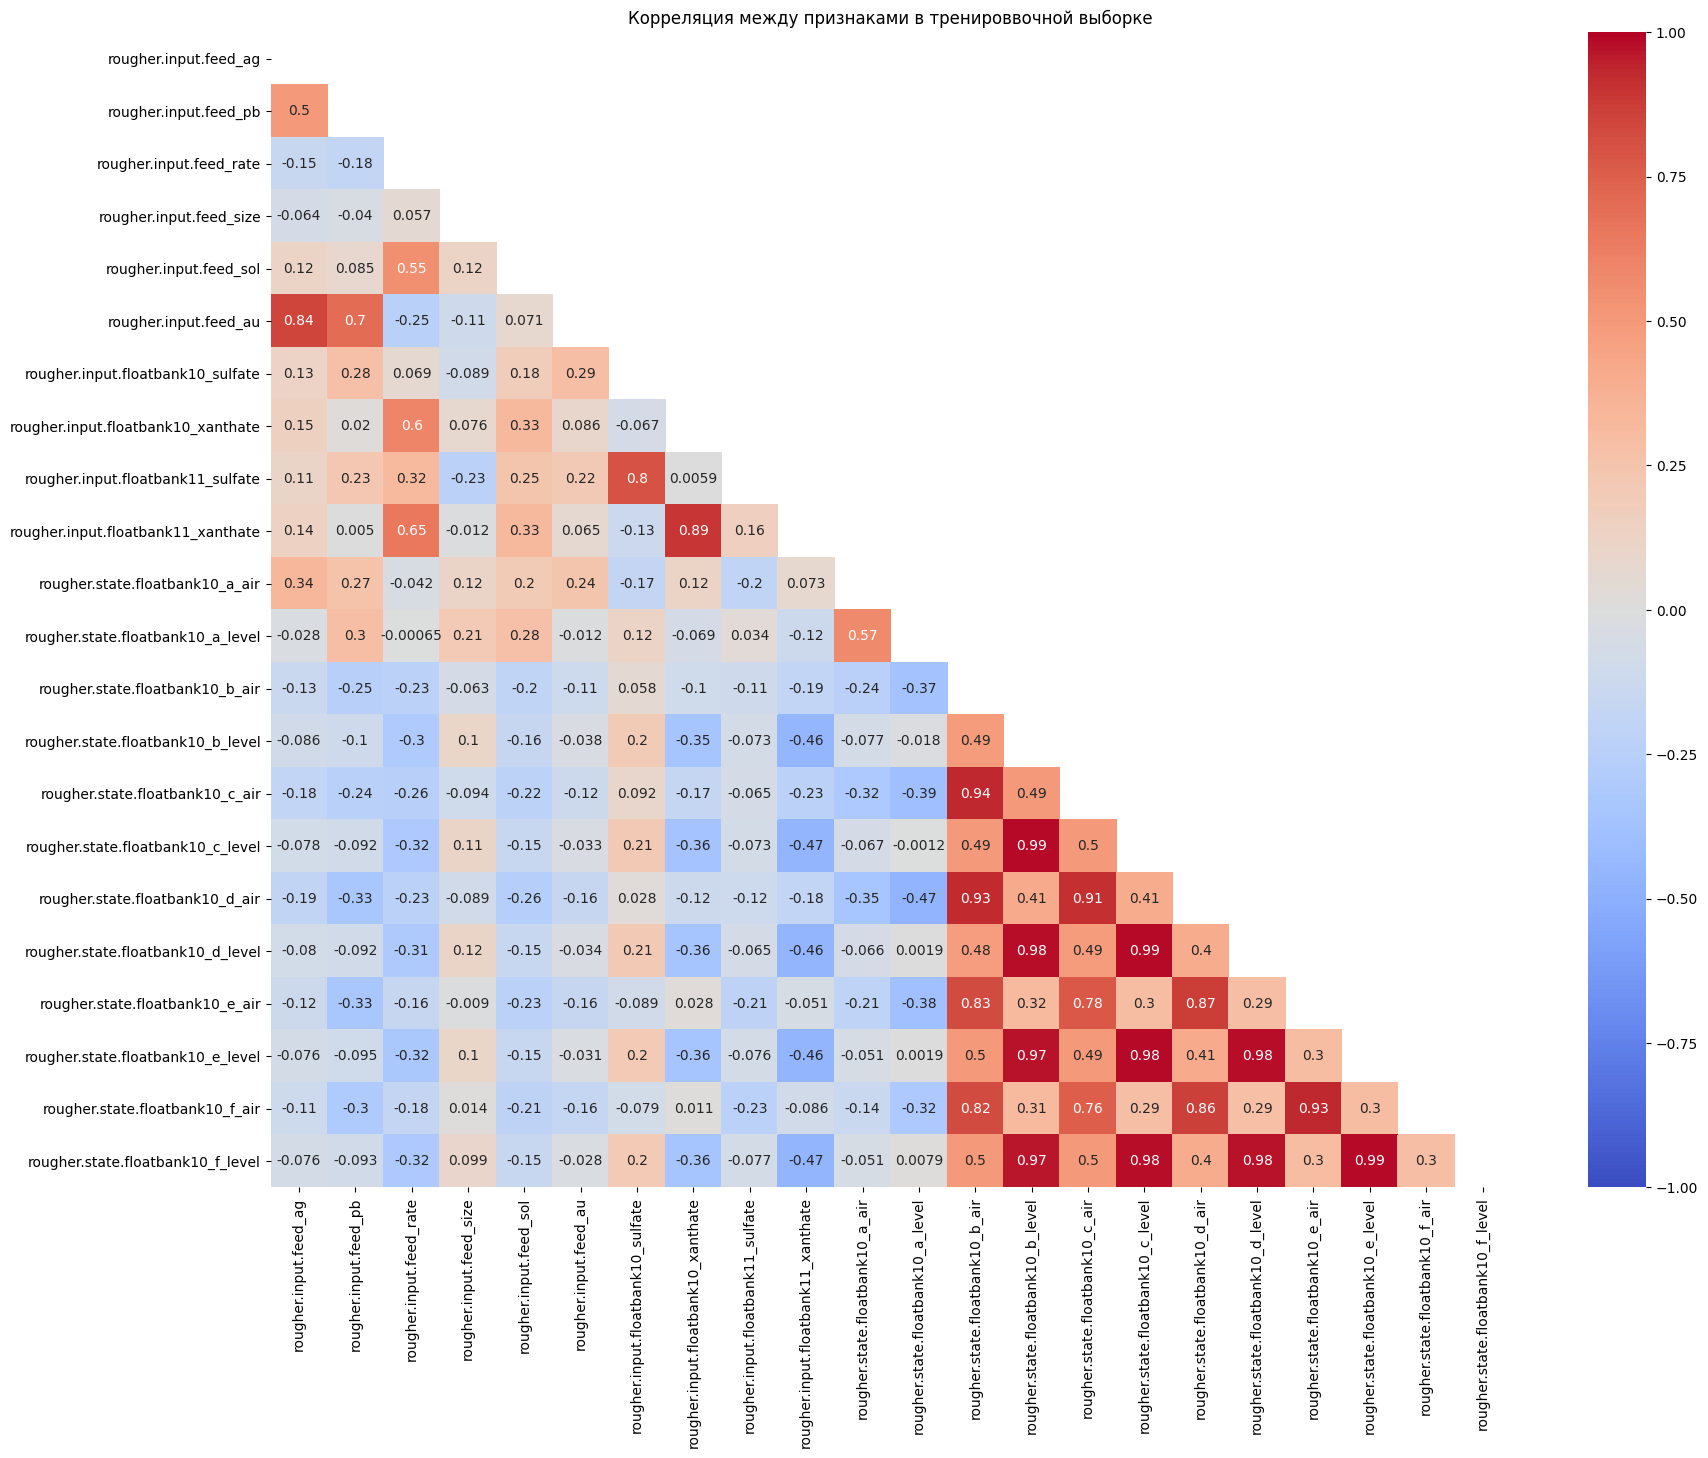

In [36]:
correlation_analysis(rougher_features_train)

Можно заметить наличие сильной линейной зависимости между некоторыми признаками. Из этого можно сделать вывод, что в дальнейшем модель линейной регрессии без регуляризации скорее всего будет переобучаться и давать смещенные оценки для параметров

#### Модель линейной регрессии OLS

In [37]:
rougher_model_regression, rougher_smape_regression = linear_regression_builder(rougher_features_train, 
                                                                               rougher_target_train)

sMAPE для модели линейной регрессии: 12.405473150849712


#### Модель регрессии Ridge

In [38]:
rougher_model_ridge, rougher_smape_ridge, rougher_alpha_ridge = ridge_builder(rougher_features_train, 
                                                                              rougher_target_train)

Значение параметра alpha на лучшей модели: 1000
sMAPE для модели регрессии Ridge: 11.990077302308627


#### Модель регрессии Lasso

In [39]:
rougher_model_lasso, rougher_smape_lasso, rougher_alpha_lasso = lasso_builder(rougher_features_train, 
                                                                              rougher_target_train)

Значение параметра alpha на лучшей модели: 1
sMAPE для модели регрессии Lasso: 11.530490211209582


#### Модель дерева решений

In [40]:
rougher_model_tree, rougher_smape_tree, rougher_depth_tree, rougher_leaf_tree = tree_builder(
    rougher_features_train, rougher_target_train)

Глубина дерева на лучшей модели: 3
Минимальное количество выборок в листе: 4
sMAPE для модели дерева решений: 12.077722086906485


### Прогнозирование эффективности обогащения финального концентрата

Разделим обучающую и тестовую выборки на признаки для построения прогнозов и целевой  
  
Так как на данном этапе исследования мы предсказываем финальную эффективность обогащения, необходимо учитыть только те признаки, которые известны на данном этапе 

In [41]:
final_columns = []

for col in train_data.columns:
    if 'primary_cleaner' in col or 'secondary_cleaner' in col:
        final_columns.append(col)
# final_columns

final_features_train = train_data[final_columns]
# final_features_train.info()

final_features_test = test_data[final_columns]
# final_features_test.info

final_target_train = train_data['final.output.recovery']
# final_target_train.head()

final_target_test = test_data['final.output.recovery']
# final_target_test.head()

#### Исследование признаков на наличие корреляции

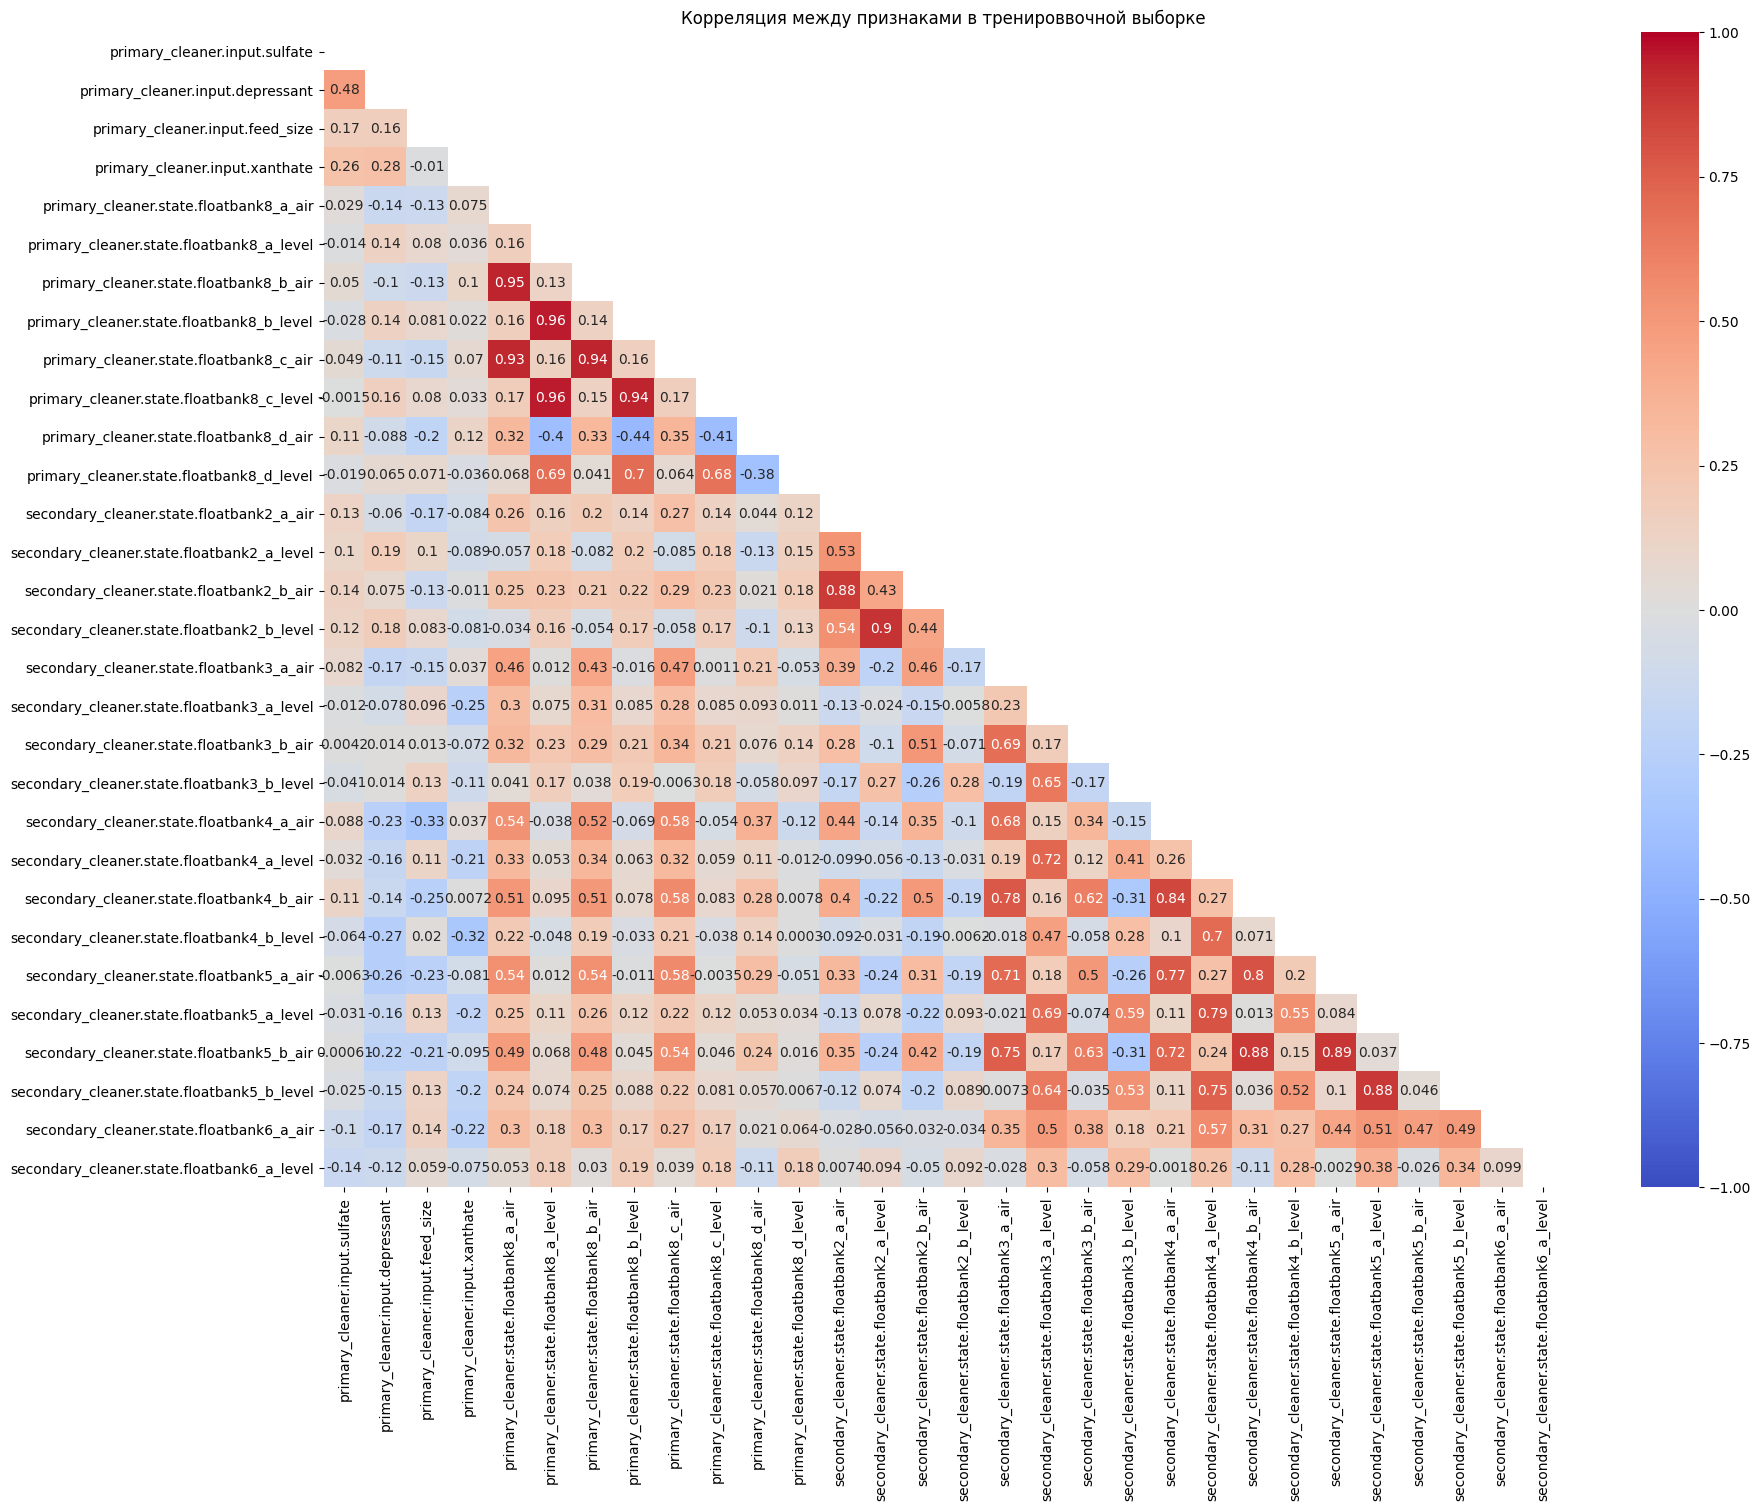

In [42]:
correlation_analysis(final_features_train)

В признаках для предсказания финальной эффективности меньше сильно скоррелированных между собой признаков, но они все же присутствуют. Это также может привести к смещенным оценкам линейной регрессии без регуляризации

#### Модель линейной регрессии OLS

In [43]:
final_model_regression, final_smape_regression = linear_regression_builder(final_features_train, 
                                                                           final_target_train)

sMAPE для модели линейной регрессии: 10.774799220069038


#### Модель регрессии Ridge

In [44]:
final_model_ridge, final_smape_ridge, final_alpha_ridge = ridge_builder(final_features_train, 
                                                                        final_target_train)

Значение параметра alpha на лучшей модели: 1000
sMAPE для модели регрессии Ridge: 10.408182119063158


#### Модель регрессии Lasso

In [45]:
final_model_lasso, final_smape_lasso, final_alpha_lasso = lasso_builder(final_features_train, 
                                                                        final_target_train)

Значение параметра alpha на лучшей модели: 1
sMAPE для модели регрессии Lasso: 10.4523006710998


#### Модель дерева решений

In [46]:
final_model_tree, final_smape_tree, final_depth_tree, final_leaf_tree = tree_builder(
    final_features_train, final_target_train)

Глубина дерева на лучшей модели: 1
Минимальное количество выборок в листе: 1
sMAPE для модели дерева решений: 11.040266206016648


### Вывод результатов и проверка модели

Для начала расчитаем итоговое sMAPE для каждой модели

In [47]:
total_smape_regression = final_smape(rougher_smape_regression, final_smape_regression)
total_smape_ridge = final_smape(rougher_smape_ridge, final_smape_ridge)
total_smape_lasso = final_smape(rougher_smape_lasso, final_smape_lasso)
total_smape_tree = final_smape(rougher_smape_tree, final_smape_tree)

In [48]:
rougher_smape_table = pd.DataFrame(
    {
        'Показатели': ['sMAPE предсказаний чернового концентрата', 
                       'sMAPE предсказаний финального концентрата', 
                       'Общий sMAPE модели'],
        'Регрессия без регуляризации': [rougher_smape_regression, 
                                        final_smape_regression, 
                                        total_smape_regression],
        'Регрессия Ridge': [rougher_smape_ridge, 
                            final_smape_ridge, 
                            total_smape_ridge],
        'Регрессия Lasso': [rougher_smape_lasso, 
                            final_smape_lasso, 
                            total_smape_lasso],
        'Дерево решений': [rougher_smape_tree, 
                           final_smape_tree, 
                           total_smape_tree],
    }
)

rougher_smape_table = rougher_smape_table.set_index('Показатели')
rougher_smape_table

,Регрессия без регуляризации,Регрессия Ridge,Регрессия Lasso,Дерево решений
Показатели,,,,
sMAPE предсказаний чернового концентрата,12.405473,11.990077,11.530490,12.077722
sMAPE предсказаний финального концентрата,10.774799,10.408182,10.452301,11.040266
Общий sMAPE модели,11.182468,10.803656,10.721848,11.299630


Таким образом, **регрессия Lasso показала наилуший результат по общему sMAPE** около 10.72. Модели с регуляризацией используются для снижения переобучепния модели. Скорее всего из-за наличия корреляции между признакам регрессия Lasso обошла линейную регрессию по показателю sMAPE.
  
Проверим данную модель на тестовой выборке

In [49]:
# Обучим модель на тренировочной выборке 
# Сохраним предсказания для эффективности обогащения чернового концентрата на тестовой выборке
rougher_model_lasso.fit(rougher_features_train, rougher_target_train)
rougher_predictions_test = rougher_model_lasso.predict(rougher_features_test)

# Посчитаем sMAPE модели предсказания обогащения чернового концентрата на тестовой выборке
rougher_smape_lasso = smape(rougher_predictions_test, rougher_target_test)

# Обучим модель на тренировочной выборке 
# Сохраним предсказания для эффективности обогащения финального концентрата на тестовой выборке
final_model_lasso.fit(final_features_train, final_target_train)
final_predictions_test = final_model_lasso.predict(final_features_test)

# Посчитаем sMAPE модели предсказания обогащения финального концентрата на тестовой выборке
final_smape_lasso = smape(final_predictions_test, final_target_test)

In [50]:
# Посчитаем итоговый sMape для модели регрессии Lasso
smape_lasso = final_smape(rougher_smape_lasso, final_smape_lasso)
print(f'Итоговый sMAPE для модели регрессии Lasso на тестовой выборке: {smape_lasso}')

Итоговый sMAPE для модели регрессии Lasso на тестовой выборке: 8.908593279741874


### Проверка модели на адекватность

Проерим получившуюся модель на адекватность при помощи сравнения sMAPE для предсказаний по `DummmyRegressor` с sMAPE нашей модели `регрессии Lasso`

In [51]:
# Обучим модель для предсказания чернового обогащения на тренировочной выборке
rougher_model_dummy = DummyRegressor(strategy='median')
rougher_model_dummy.fit(rougher_features_train, rougher_target_train)

# Сохраним предсказания на тестовой выборке
rougher_dummy_predictions = rougher_model_dummy.predict(rougher_features_test)

# Посчитаем sMAPE модели предсказания обогащения чернового концентрата на тестовой выборке
rougher_smape_dummy = smape(rougher_dummy_predictions, rougher_target_test)

# Обучим модель для предсказания финального обогащения на тренировочной выборке
final_model_dummy = DummyRegressor(strategy='median')
final_model_dummy.fit(final_features_train, final_target_train)

# Сохраним предсказания на тестовой выборке
final_dummy_predictions = final_model_dummy.predict(final_features_test)

# Посчитаем sMAPE модели предсказания обогащения чернового концентрата на тестовой выборке
final_smape_dummy = smape(final_dummy_predictions, final_target_test)

In [52]:
# Посчитаем итоговый sMape для модели dummy
smape_dummy = final_smape(rougher_smape_dummy, final_smape_dummy)
print(f'Итоговый sMAPE для модели регрессии Lasso на тестовой выборке: {smape_dummy}')

Итоговый sMAPE для модели регрессии Lasso на тестовой выборке: 9.481020013715217


Таким образом, sMAPE модели регрессии Lasso получился ниже, чем sMAPE модели dummy. Это говорит о том, что качество подобранной нами модели выше, чем качество модели с примитивным способом предсказания (по медиане)  
  
Модель регрессии Lasso прошла проверку на адекватность

## Общий вывод

Подводя итоги, целью данного проекта было построить модель, предсказывающую коэффициент восстановления золота из золотосодержащей руды. Модель должна помочь в оптимизировании производства, и она использоваться для предотвращения убыточных предприятий.  
  
При подготовке данных были проведены следующие этапы:
- Мы открыли и изучили файлы с обучающей, тестовой и изначальной выборками
- Проверили их на предмет праивльности расчетов эффективности по формуле
- Были удалены те столбцы из обучающей выборки, которые не могут использоваться при построении модели ввиду отсутствия показателей на рассматриваемом этапе исследования
- Была проведена предобработка данных: 
 1) Изменен тип данных в столбце `date` на временной
 2) Датасеты были проверены на наличие дубликатов
 3) Были заполнены пропуски методом LOCF  
  
Далее нами была изучена выборка:
- Мы проанализировали изменение средней концентрации металлоа на разных этапах очистки: 
 1) Золото линейно растет по мере приблежения к финальной стадии
 2) Концентрация свинца также увеличивается, но с замедлением
 3) Концентрация серебра растет после флотации, а на последующих этапах убывает
- Мы сравнили распределения размеров гранул сырья на обучающей и тестовой выборках для того, чтобы убедиться в возможности построения правильных прогнозов с помощью моделей: распределения похожи
- При исследовании суммарной концентрации всех веществ в черновом и финальных концентратах на разных стадиях, мы заметили наличие выбросов около нуля и удалили их  
  
После мы провели подготовку к построению моделей:
- Провели масштабирование признаков
- Написали функции для расчета метрик качества sMAPE и итоговой sMAPE
- Написали функцию для проверки датасета на наличие корреляции между признаками
- Написали функции, строящие модели. Они оценивали разные гиперпараметры с помощью кросс - валидации и подбирали модель с лучшим результатом указанной метрики  
  
На следующем этапе проекта мы построили модели для предсказания эффективностей обогащения чернового концентрата `rougher.output.recovery` и финального концентрата `final.output.recovery`. Рассматривались следующие модели:
- Линейная регрессия без регуляризации
- Регрессия с регуляризацией
 1) Ridge
 2) Lasso
- Дерево решений  
  
Модель **регрессии Lasso** дала наилучший результат метрики итоговой sMAPE - около `10.72`. При проверки упомянутой модели на тестовой выборке итоговый sMAPE упал примерно до `8.91`.  
  
Также, полученная модель была проверена на адекатность посредством сравнения итогового sMAPE модели dummy с sMAPE регрессии Lasso. Модель прошла проверку на адекатность, так как значение итогового sMAPE у нее оказалось ниже, чем у примитивной модели с предсказаниями по медиане.  
  
Следовательно, в ходе исследования была найдена лучшая модель, которая может быть презентована заказчику